In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
#Скрывает предупреждения

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
df = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')

In [ ]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
#Извлечение марки машнины из столбца 'name'

f = lambda x: x["name"].split()[0]
df["name"] = df.apply(f, axis=1)

In [ ]:
ohe = OneHotEncoder()

In [ ]:
df['year'] = df['year'].astype('object')

In [ ]:
#Кодирование категориальных переменных 

df2 = pd.DataFrame(ohe.fit_transform(df[df.dtypes[df.dtypes == 'object'].index.tolist()]).toarray())

In [ ]:
df = df.select_dtypes(exclude=['object'])

In [ ]:
#Готовый для работы датафрейм

df = df.join(df2)

In [ ]:
df

,selling_price,km_driven,0,1,2,3,4,5,6,7,...,61,62,63,64,65,66,67,68,69,70
0,60000,70000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,135000,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,600000,100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,250000,46000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,450000,141000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4336,409999,80000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4337,110000,83000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4338,865000,90000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X = df.drop('selling_price', axis=1)
y = df.selling_price

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
def print_metrics (yt, yp, what=''):
    mae = mean_absolute_error(yt, yp)
    print(f"{what}: mae = {mae}")

In [ ]:
#Линейная регрессия

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [ ]:
print_metrics(y_train, y_pred_train, "TRAIN")
print_metrics(y_test, y_pred_test, "TEST")

TRAIN: mae = 171241.7138394723
TEST: mae = 184381.79960788612


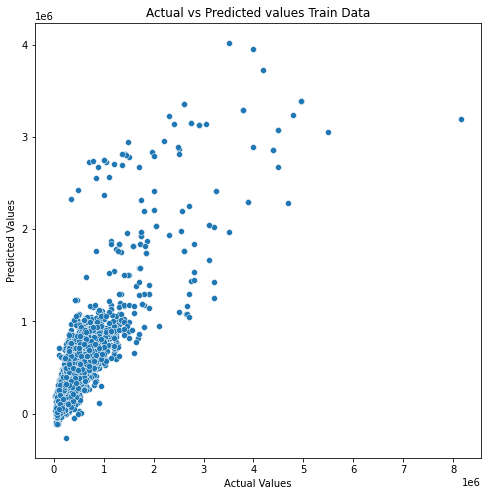

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_train, y = y_pred_train)
plt.title("Actual vs Predicted values Train Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

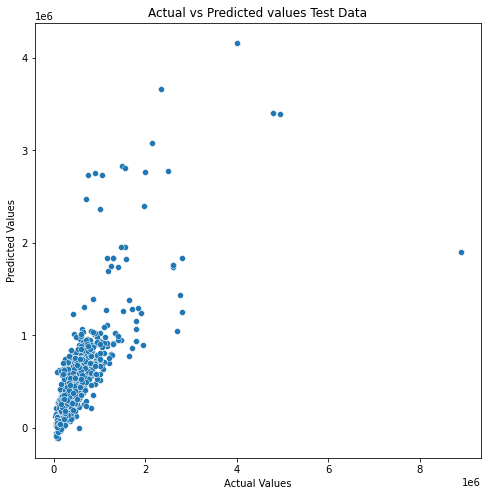

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = y_pred_test)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params ={'alpha' : [0.1,0.5,1,2,5,10]}

In [ ]:
#Подбор лучшего значения для параметра 'alpha'

rm = Ridge()
reg = GridSearchCV(rm, params)
reg.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10]})

In [ ]:
print(reg.best_score_, reg.best_params_)

0.7235683672775833 {'alpha': 0.1}


In [ ]:
#Ridge

rm = Ridge(alpha=0.1)
rm.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
r_train = rm.predict(X_train)
r_test = rm.predict(X_test)

In [ ]:
print_metrics(y_train, r_train, "TRAIN")
print_metrics(y_test, r_test, 'TEST')

TRAIN: mae = 171390.77247453705
TEST: mae = 184098.98234995294


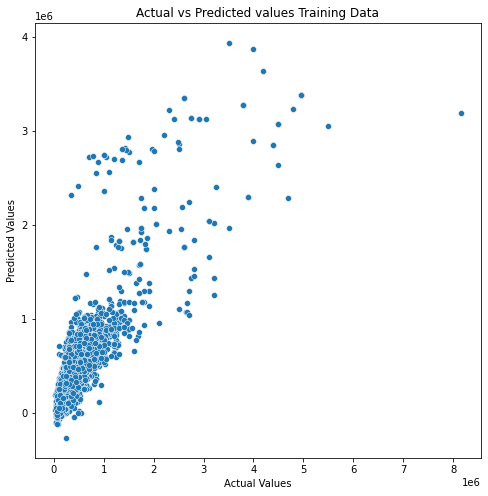

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_train, y = r_train)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

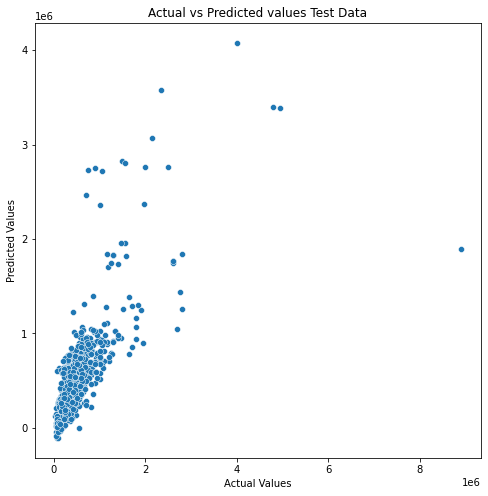

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = r_test)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
#Lasso 

lm = Lasso()
reg = GridSearchCV(lm, params)
reg.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 0.5, 1, 2, 5, 10]})

In [ ]:
print(reg.best_score_, reg.best_params_)

0.7241128858984865 {'alpha': 10}


In [ ]:
lm = Lasso(alpha=10)
lm.fit(X_train,y_train)

Lasso(alpha=10)

In [ ]:
l_train = lm.predict(X_train)
l_test = lm.predict(X_test)

In [ ]:
#Наилучшее значение MAE

print_metrics(y_train, l_train, "TRAIN")
print_metrics(y_test, l_test, 'TEST')

TRAIN: mae = 171317.59846649104
TEST: mae = 183770.22729851204


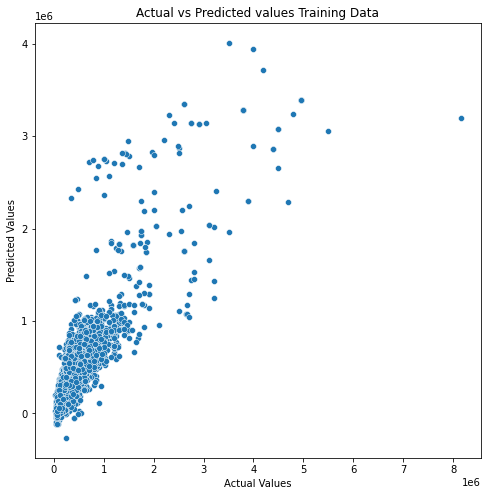

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_train, y = l_train)
plt.title("Actual vs Predicted values Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

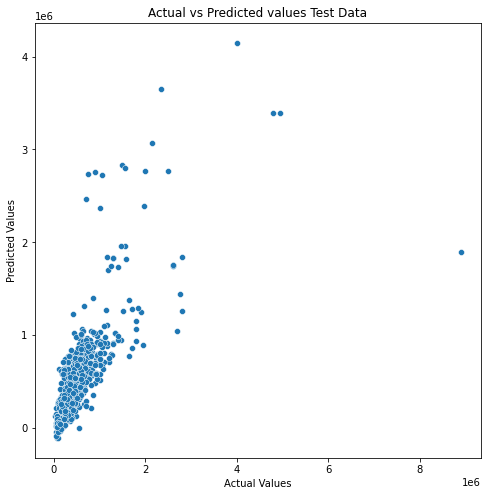

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_test, y = l_test)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()